<a href="https://colab.research.google.com/github/DSJR741221/DSJackieR/blob/main/DS_C3_SC2_Jacqueline_G_Richard_Rodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DS_C3_SC2 - GEOVISUALIZACIÓN**

---

**Reto: Análisis para abrir una nueva sucursal de comida rápida en México**

NOMBRE DEL PARTICIPANTE: Jacqueline Gabriela Richard Rodríguez

1. Crea una nueva libreta de Google Colab para programar tu script en Python.

2. Carga los datos de los Estados de la República Mexicana en un GeoDataFrame: **Los archivos se cargan y se crea un GeoDataFrame que contiene en su atributo geometry los polígonos que conforman los estados.**

In [ ]:
import pandas as pd
import numpy as np
import geopandas
from shapely.geometry import Point, LineString, Polygon
from google.colab import drive

# Ruta al archivo shapefile
# Enviar a un archivo el GeoDataFrame creado y Mostrar las primeras filas del GeoDataFrame

# Cargar el shapefile en un GeoDataFrame

drive.mount('/content/gdrive')

mex=geopandas.read_file('/content/gdrive/MyDrive/Colab Notebooks/TLG_Geopandas/mexican-states.shp')

mex.columns

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Index(['ISO3166-2', 'admin_leve', 'boundary', 'is_in_coun', 'is_in_co_1',
       'name', 'name_en', 'name_es', 'name_pl', 'name_ru', 'name_uk', 'place',
       'ref', 'type', 'wikidata', 'wikipedia', 'geometry'],
      dtype='object')

In [ ]:
mex.to_csv("/content/sample_data/gdf_estados.csv")

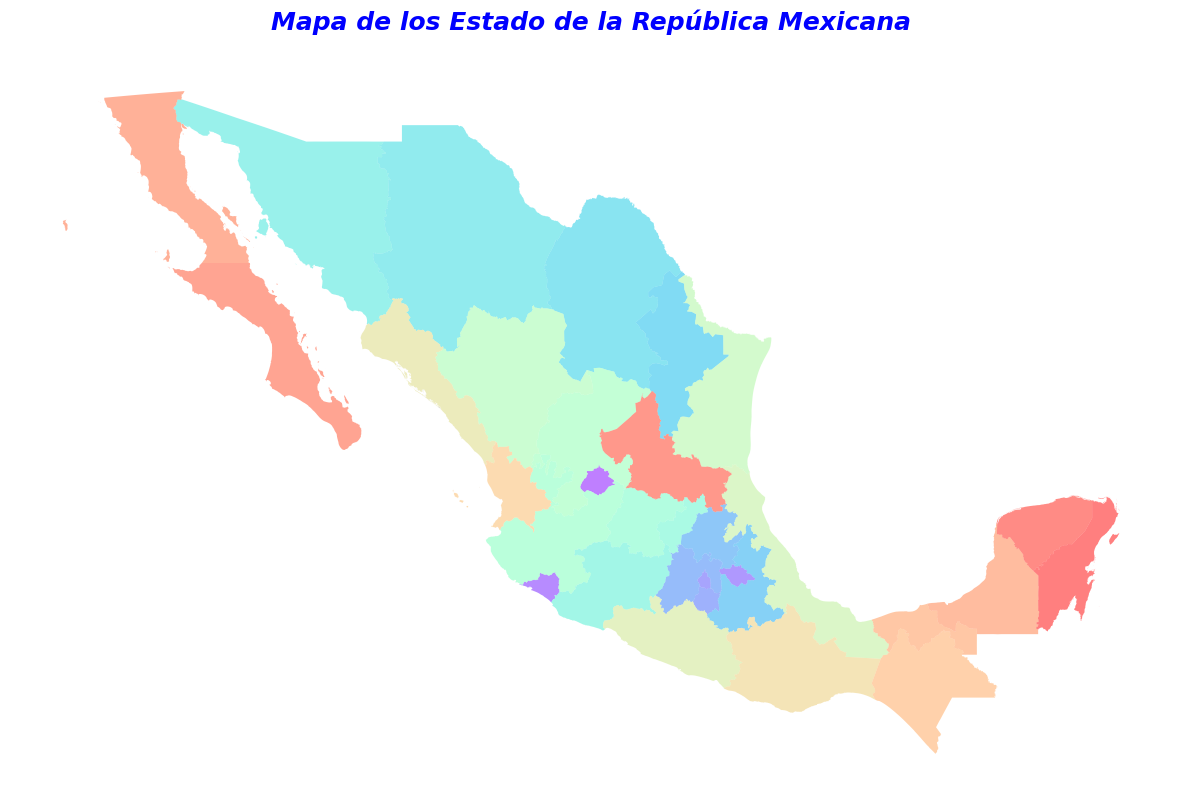

In [ ]:
mapa=mex.plot(alpha=0.5, cmap="rainbow", figsize=(15, 10))

# Añadir título y personalizar el mapa
mapa.set_title('Mapa de los Estado de la República Mexicana', color='blue', fontsize=18, fontweight='bold', style='italic', loc='center', pad=20)
mapa.set_axis_off()

3. Carga los datos de la localización de las sucursales de Costco® en un DataFrame: **Archivo cargado**

In [ ]:
costco_loc=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/TLG_Geopandas/tiendaCostco.csv")

costco_loc.columns


Index(['id', 'nombre', ' direccion', ' ubicacion', ' latitud', ' longitud',
       ' tel centro llantero'],
      dtype='object')

4. Convierte los datos de la localización de las sucursales de Costco® en un GeoDataFrame, creando puntos a partir de la longitud y latitud de cada sucursal : **Se crea un GeoDataFrame que contiene en su atributo geometry la localización de las sucursales.**

In [ ]:
gdf_costco = geopandas.GeoDataFrame(costco_loc, geometry=geopandas.points_from_xy(costco_loc[" longitud"], costco_loc[" latitud"]))

gdf_costco.columns

Index(['id', 'nombre', ' direccion', ' ubicacion', ' latitud', ' longitud',
       ' tel centro llantero', 'geometry'],
      dtype='object')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


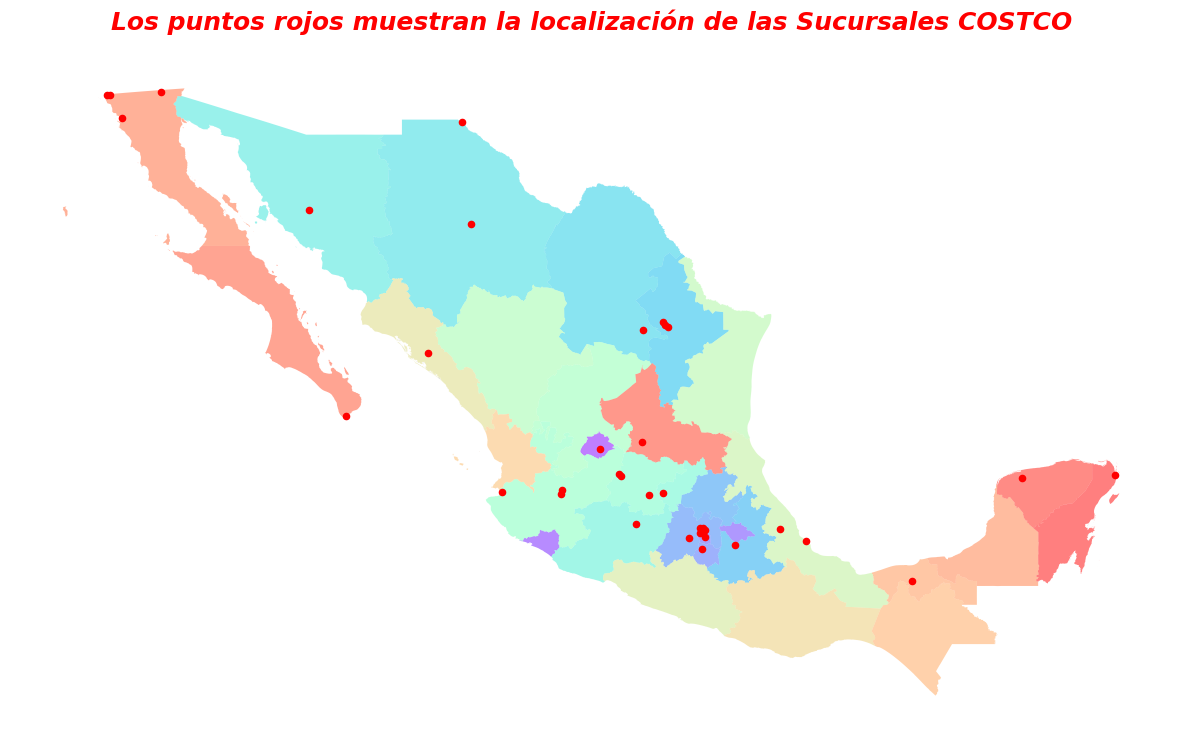

In [ ]:
# Montamos Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Cargamos los datos de los estados

mex=geopandas.read_file('/content/gdrive/MyDrive/Colab Notebooks/TLG_Geopandas/mexican-states.shp')

mex.columns

# Cargamos los datos de las sucursales

costco_loc=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/TLG_Geopandas/tiendaCostco.csv")

gdf_costco = geopandas.GeoDataFrame(costco_loc, geometry=geopandas.points_from_xy(costco_loc[" longitud"], costco_loc[" latitud"]))

# Pintamos el mapa base
mapa = mex.plot(alpha=0.5, cmap="rainbow", figsize=(15, 10))

# Pintamos los puntos correspondientes a las sucursales
gdf_costco.plot(ax=mapa, color="red", markersize=20)

# Añadir título y personalizar el mapa
mapa.set_title('Los puntos rojos muestran la localización de las Sucursales COSTCO', color='red', fontsize=18, fontweight='bold', style='italic', loc='center', pad=20)
mapa.set_axis_off()


5. Agrega una columna a los estados que indique la región a la que pertenecen y separa el GeoDataFrame por regiones en lugar de por estados:
a)	Centro: Tlaxcala, Puebla, CDMX, Morelos, Estado de México e Hidalgo
b)	Centro Oeste: Jalisco, Michoacán, Colima, Aguascalientes, Nayarit, Zacatecas, San Luis Potosí, Guanajuato y Querétaro.
c)	Noreste: Chihuahua, Coahuila, Nuevo León, Tamaulipas y Durango
d)	Noroeste: Baja California Norte, Baja California Sur, Sonora y Sinaloa
e)	Sureste: Guerrero, Veracruz, Oaxaca, Tabasco, Chiapas, Campeche, Yucatán y Quintana Roo: **El GeoDataFrame se separa por regiones tal como se indica en las instrucciones**

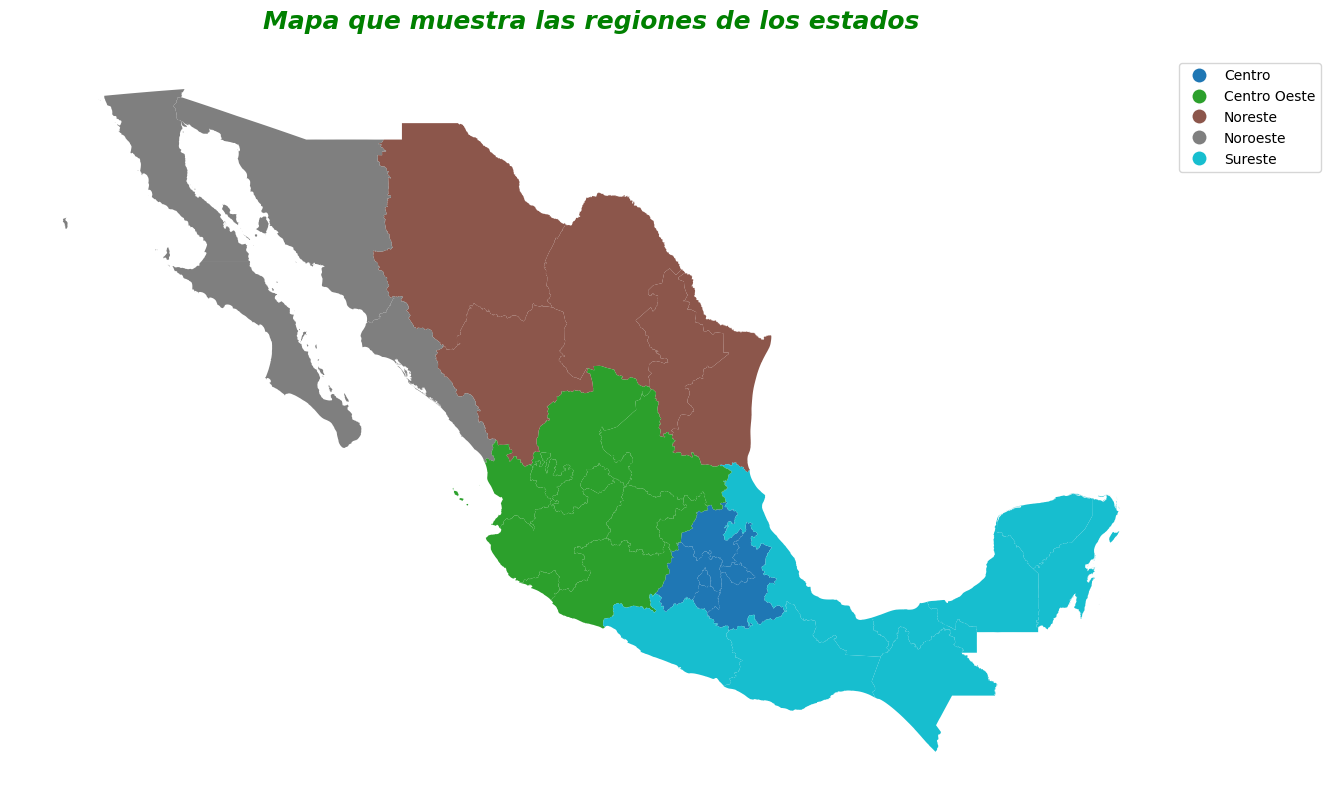

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Crear una copia del GeoDataFrame
mex_copy = mex.copy()

# Renombrar el GeoDataFrame copiado (puedes usar cualquier nombre que desees)
new_mex = mex_copy

# Supongamos que tu GeoDataFrame de estados se llama `gdf_estados`
# y tiene una columna 'estado' con el nombre de los estados.

# Definir las regiones y sus estados
regiones = {
    'Centro': ['MX-TLA', 'MX-PUE', 'MX-CMX', 'MX-MOR', 'MX-MEX', 'MX-HID'],
    'Centro Oeste': ['MX-JAL', 'MX-MIC', 'MX-COL', 'MX-AGU', 'MX-NAY', 'MX-ZAC', 'MX-SLP', 'MX-GUA', 'MX-QUE'],
    'Noreste': ['MX-CHH', 'MX-COA', 'MX-NLE', 'MX-TAM', 'MX-DUR'],
    'Noroeste': ['MX-BCN', 'MX-BCS', 'MX-SON', 'MX-SIN'],
    'Sureste': ['MX-GRO', 'MX-VER', 'MX-OAX', 'MX-TAB', 'MX-CHP', 'MX-CAM', 'MX-YUC', 'MX-ROO']
}

# Crear una función que asigne la región correspondiente a cada estado
def asignar_region(estado):
    for region, estados in regiones.items():
        if estado in estados:
            return region
    return None

# Agregar la columna 'region' al GeoDataFrame
new_mex['region'] = new_mex['ISO3166-2'].apply(asignar_region)

# Crear un mapa coloreado por región
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
new_mex.plot(column='region', ax=ax, legend=True, legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})

# Filtrar el GeoDataFrame por cada región y combinar los resultados en un nuevo GeoDataFrame
gdf_regiones = gpd.GeoDataFrame(pd.concat([new_mex[new_mex['region'] == region] for region in regiones.keys()]))

# Ahora `gdf_regiones` contiene los datos de los estados agrupados por región
gdf_regiones.columns

# Añadir título y personalizar el mapa
ax.set_title('Mapa que muestra las regiones de los estados', color='green', fontsize=18, fontweight='bold', style='italic', loc='center', pad=20)
ax.set_axis_off()


6. Crea un buffer de 120 km alrededor de los puntos de localización de cada sucursal.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


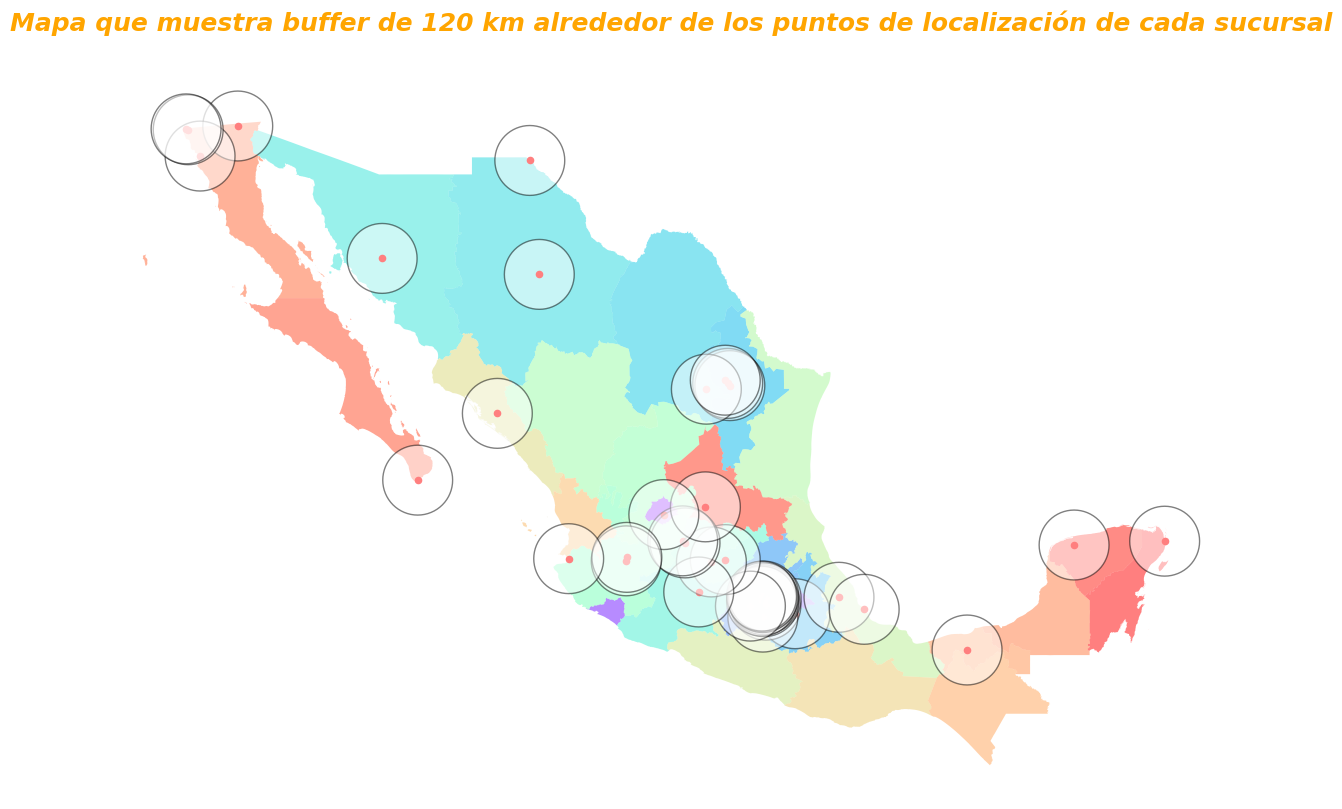

In [ ]:

import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
from google.colab import drive
import matplotlib.pyplot as plt
import folium


# Montamos Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Cargamos los datos de los estados

mex=geopandas.read_file('/content/gdrive/MyDrive/Colab Notebooks/TLG_Geopandas/mexican-states.shp')

mex.columns

# Cargamos los datos de las sucursales

costco_loc=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/TLG_Geopandas/tiendaCostco.csv")

gdf_costco = geopandas.GeoDataFrame(costco_loc, geometry=geopandas.points_from_xy(costco_loc[" longitud"], costco_loc[" latitud"]))

# Establecer el sistema de coordenadas (CRS) a WGS84 (lat/lon) # 6. Asegura que ambos GeoDataFrames utilicen el CRS epsg=3395 que usa metros como medida de distancia
mex.set_crs(epsg=4326, inplace=True)
mex = mex.to_crs(epsg=3395)
gdf_costco.set_crs(epsg=4326, inplace=True)

# Pintamos el mapa base
mapa2 = mex.plot(alpha=0.5, cmap="rainbow", figsize=(15, 10))

# Luego, convierte a un sistema de coordenadas proyectadas antes de calcular el buffer
gdf_costco = gdf_costco.to_crs('EPSG:3395')

# Pintamos los puntos correspondientes a las sucursales
gdf_costco.plot(ax=mapa2, color="red", markersize=20)

# Ahora puedes calcular los buffers correctamente
gdf_costco['geometry'] = gdf_costco.buffer(120000)  # 120 km = 120,000 m

# Pintamos los buffers
gdf_costco['geometry'].plot(ax=mapa2, color='white', alpha=0.5, edgecolor='k', label='Buffers de 120 km')

# Añadir título y personalizar el mapa
mapa2.set_title('Mapa que muestra buffer de 120 km alrededor de los puntos de localización de cada sucursal', color='orange', fontsize=18, fontweight='bold', style='italic', loc='center', pad=20)
mapa2.set_axis_off()


7. Grafica la intersección de las regiones con los círculos creados a partir de la localización de las sucursales.

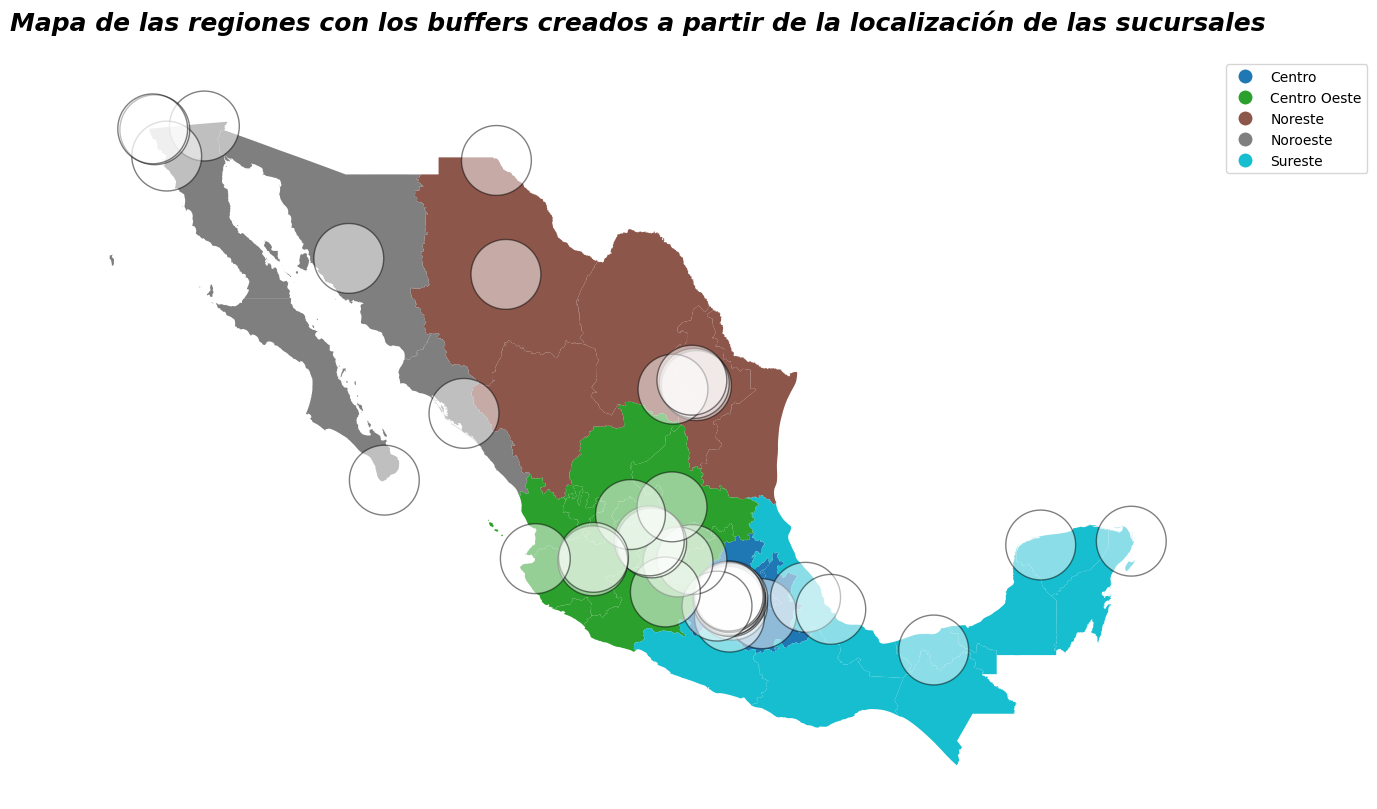

In [ ]:
# prompt: Grafica la intersección del mapa de las regiones con los buffers creados a partir de la localización de las sucursales

import matplotlib.pyplot as plt
# Crear una copia del GeoDataFrame
mex_copy = mex.copy()

# Renombrar el GeoDataFrame copiado (puedes usar cualquier nombre que desees)
new_mex = mex_copy

# Supongamos que tu GeoDataFrame de estados se llama `gdf_estados`
# y tiene una columna 'estado' con el nombre de los estados.

# Definir las regiones y sus estados
regiones = {
    'Centro': ['MX-TLA', 'MX-PUE', 'MX-CMX', 'MX-MOR', 'MX-MEX', 'MX-HID'],
    'Centro Oeste': ['MX-JAL', 'MX-MIC', 'MX-COL', 'MX-AGU', 'MX-NAY', 'MX-ZAC', 'MX-SLP', 'MX-GUA', 'MX-QUE'],
    'Noreste': ['MX-CHH', 'MX-COA', 'MX-NLE', 'MX-TAM', 'MX-DUR'],
    'Noroeste': ['MX-BCN', 'MX-BCS', 'MX-SON', 'MX-SIN'],
    'Sureste': ['MX-GRO', 'MX-VER', 'MX-OAX', 'MX-TAB', 'MX-CHP', 'MX-CAM', 'MX-YUC', 'MX-ROO']
}

# Crear una función que asigne la región correspondiente a cada estado
def asignar_region(estado):
    for region, estados in regiones.items():
        if estado in estados:
            return region
    return None

# Agregar la columna 'region' al GeoDataFrame
new_mex['region'] = new_mex['ISO3166-2'].apply(asignar_region)

# Crear un mapa coloreado por región
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
new_mex.plot(column='region', ax=ax, legend=True, legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})

# Plot the buffers
gdf_costco['geometry'].plot(ax=ax, color='white', alpha=0.5, edgecolor='k', label='Buffers de 120 km')

# Set the title and axis labels
ax.set_title('Mapa de las regiones con los buffers creados a partir de la localización de las sucursales', color='black', fontsize=18, fontweight='bold', style='italic', loc='center', pad=20)
ax.set_axis_off()

# Show the plot
plt.show()


9. Identifica las regiones en donde se requiere más cobertura y responde la pregunta: ¿En qué regiones del país (Centro, Centro Oeste, Noreste, Noroeste, Sureste) NO es conveniente abrir una nueva sucursal debido a la falta de cobertura de entregas a domicilio?.

Respuesta:

No es conveniente abrir sucursales de restaurantes de comida rápida en las regiones Sureste, Noroeste y Noreste

10.	Nombra tu archivo de la siguiente manera: DS_C3_SC2_NOMBRE.
11.	Otorga permisos al archivo para que sea evaluado (Opción: “Anyone with the link”).
12.	Coloca únicamente la liga a tu libreta de Google Colab.